In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr,kendalltau
from matplotlib import rc_params
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

In [2]:
bank=pd.read_csv("bankruptcy-prevention.csv",delimiter=";")

In [3]:
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
bank.shape

(250, 7)

In [6]:
bank.size

1750

In [7]:
bank.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [8]:
bank.describe(include="all")

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,non-bankruptcy
freq,NaN,NaN,NaN,NaN,NaN,NaN,143
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,NaN
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,NaN


In [9]:
bank[bank.duplicated()].shape

(147, 7)

In [10]:
bank[bank.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [11]:
bank1=bank.drop_duplicates()

In [12]:
bank1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [13]:
bank1[" class"].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [14]:
bank1[" class"].value_counts()

non-bankruptcy    78
bankruptcy        25
Name:  class, dtype: int64

In [15]:
# Remaining columns to avoid the error

bank1=bank1.rename(columns={bank.columns[6]: "class_value"})
bank1=bank1.rename(columns={bank.columns[5]: "operating_risk"})
bank1=bank1.rename(columns={bank.columns[4]: "competitiveness"})
bank1=bank1.rename(columns={bank.columns[3]: "credibility"})
bank1=bank1.rename(columns={bank.columns[2]: "financial_flexibility"})
bank1=bank1.rename(columns={bank.columns[1]: "management_risk"})

In [16]:
bank1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [17]:
bank1.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy
194,0.0,1.0,0.5,0.0,0.5,0.0,non-bankruptcy


Here are we taking a bankruptcy = 0 and Non-bankruptcy=1 by encoding data

In [20]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
bank1["class_value"]=label_encoder.fit_transform(bank1["class_value"])

In [21]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
bank[" class"]=encode.fit_transform(bank[" class"])

In [22]:
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [23]:
corr_values=bank1.corr()

In [24]:
corr_values

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581,-0.217132
management_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500,-0.188887
financial_flexibility,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401,0.624573
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603,0.606350
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165,0.859809
operating_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000,-0.136393
class_value,-0.217132,-0.188887,0.624573,0.606350,0.859809,-0.136393,1.000000


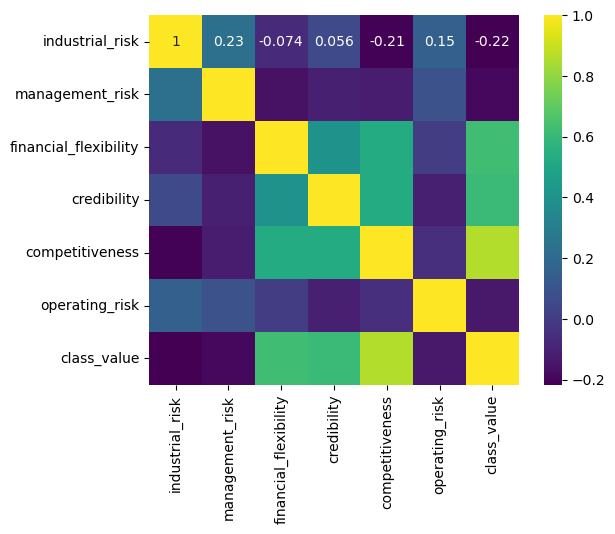

In [25]:
sns.heatmap(corr_values,annot=True,square=True,cmap="viridis")
plt.yticks(rotation=0)
plt.show()

In [26]:
features=bank1.columns[0:6]

In [27]:
features

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

Spearmans Correlation

In [28]:
for feature in features:
  coef,p=spearmanr(bank1[feature],bank1.class_value)
  print("Correlation of %s" %feature,coef)

Correlation of industrial_risk -0.2153810469171199
Correlation of management_risk -0.18958686078787065
Correlation of financial_flexibility 0.6229808739662495
Correlation of credibility 0.5783095079827799
Correlation of competitiveness 0.8022101084491644
Correlation of operating_risk -0.13685936333601945


Kendall's Correlation

In [29]:
for feature in features:
  coef,p=kendalltau(bank1[feature],bank1.class_value)
  print("Correlation of %s" %feature,coef)

Correlation of industrial_risk -0.2030951516385892
Correlation of management_risk -0.17901394418363425
Correlation of financial_flexibility 0.5873998015305992
Correlation of credibility 0.5479312639058955
Correlation of competitiveness 0.7618581023515246
Correlation of operating_risk -0.12946751287186073


In [30]:
bank1.columns
pd.crosstab(bank1.industrial_risk,bank1.class_value)

class_value,0,1
industrial_risk,,
0.0,6,29
0.5,6,30
1.0,13,19


In [31]:
pd.crosstab(bank1.industrial_risk,bank1.class_value,normalize="index")

class_value,0,1
industrial_risk,,
0.0,0.171429,0.828571
0.5,0.166667,0.833333
1.0,0.406250,0.593750


In [32]:
pd.crosstab(bank1.management_risk,bank1.class_value)

class_value,0,1
management_risk,,
0.0,4,25
0.5,7,25
1.0,14,28


In [33]:
pd.crosstab(bank1.management_risk,bank1.class_value,normalize="index")

class_value,0,1
management_risk,,
0.0,0.137931,0.862069
0.5,0.218750,0.781250
1.0,0.333333,0.666667


In [34]:
pd.crosstab(bank1.financial_flexibility,bank1.class_value)

class_value,0,1
financial_flexibility,,
0.0,23,10
0.5,1,35
1.0,1,33


In [35]:
pd.crosstab(bank1.financial_flexibility,bank1.class_value,normalize="index")

class_value,0,1
financial_flexibility,,
0.0,0.696970,0.303030
0.5,0.027778,0.972222
1.0,0.029412,0.970588


In [36]:
pd.crosstab(bank1.credibility,bank1.class_value)

class_value,0,1
credibility,,
0.0,18,4
0.5,5,37
1.0,2,37


In [37]:
pd.crosstab(bank1.credibility,bank1.class_value,normalize="index")

class_value,0,1
credibility,,
0.0,0.818182,0.181818
0.5,0.119048,0.880952
1.0,0.051282,0.948718


In [38]:
pd.crosstab(bank1.competitiveness,bank1.class_value)

class_value,0,1
competitiveness,,
0.0,24,0
0.5,1,25
1.0,0,53


In [39]:
pd.crosstab(bank1.competitiveness,bank1.class_value,normalize="index")

class_value,0,1
competitiveness,,
0.0,1.000000,0.000000
0.5,0.038462,0.961538
1.0,0.000000,1.000000


In [40]:
pd.crosstab(bank1.operating_risk,bank1.class_value)

class_value,0,1
operating_risk,,
0.0,7,31
0.5,5,19
1.0,13,28


In [41]:
pd.crosstab(bank1.operating_risk,bank1.class_value,normalize="index")

class_value,0,1
operating_risk,,
0.0,0.184211,0.815789
0.5,0.208333,0.791667
1.0,0.317073,0.682927


In [42]:
pd.crosstab(bank1.financial_flexibility, bank1.competitiveness, normalize='index')


competitiveness,0.0,0.5,1.0
financial_flexibility,,,
0.0,0.666667,0.060606,0.272727
0.5,0.027778,0.416667,0.555556
1.0,0.029412,0.264706,0.705882


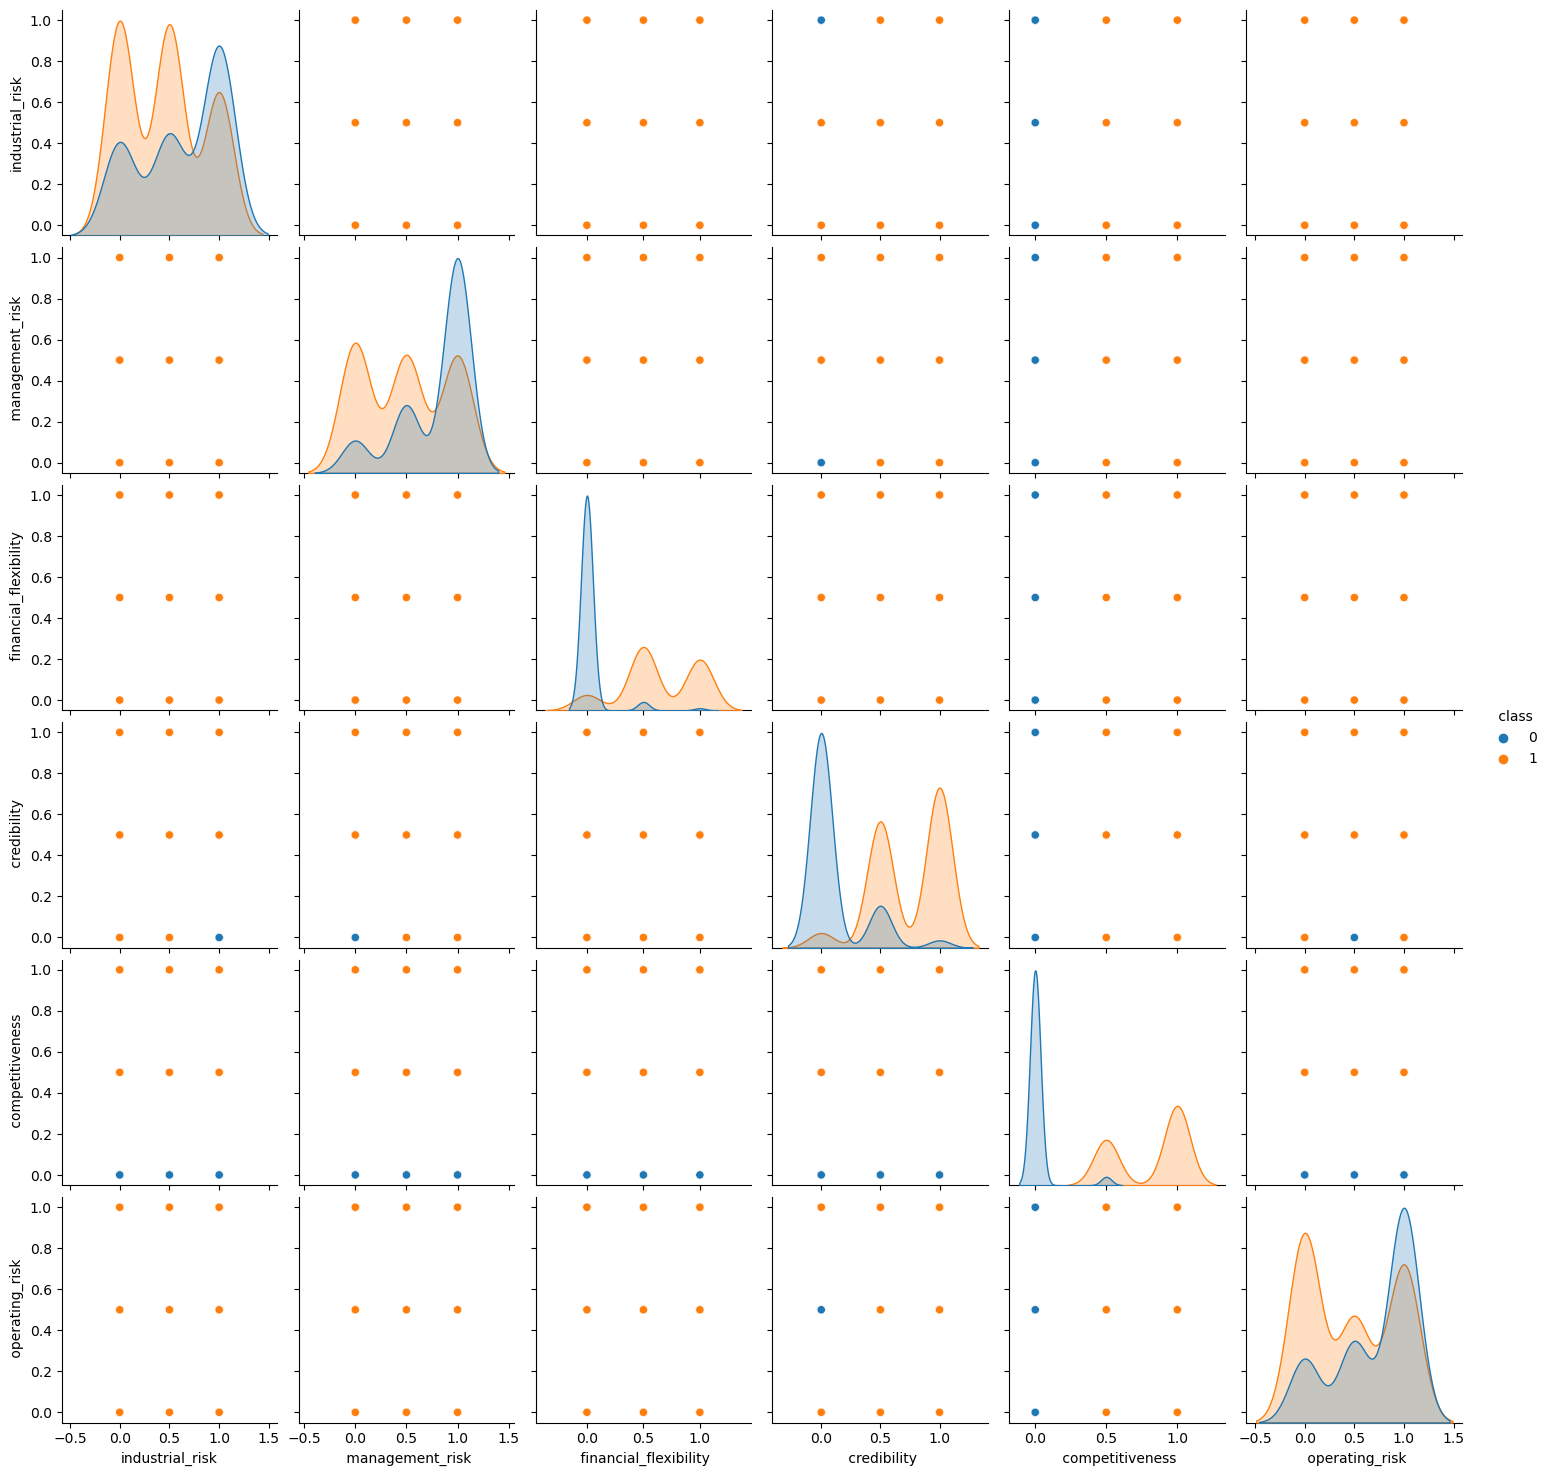

In [43]:
#Pairplot to understand relationships between variables within a dataset
sns.pairplot(bank, hue = ' class')

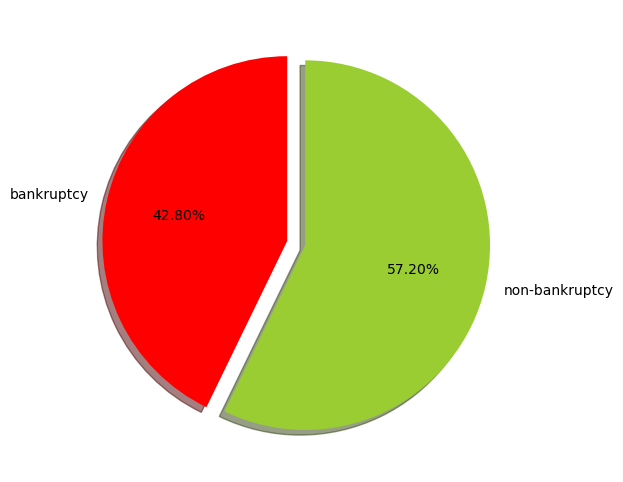

In [44]:
a =bank[' class'].value_counts()[0]
b =bank[' class'].value_counts()[1]


fig1, ax1 = plt.subplots(figsize=(8, 6))
label = ['bankruptcy', 'non-bankruptcy']
count = [a, b]
colors = ['red', 'yellowgreen']
explode = (0, 0.1)  # explode 2nd slice
plt.pie(count, labels=label, autopct='%0.2f%%', explode=explode, colors=colors,shadow=True, startangle=90)
plt.show()

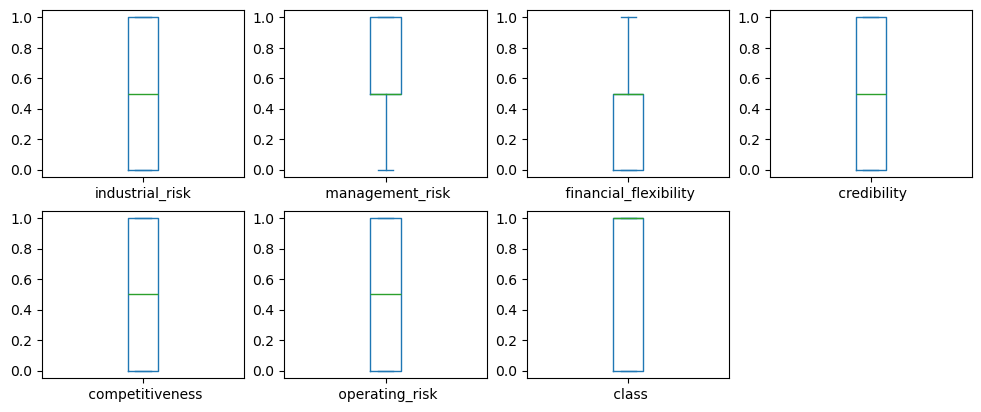

In [45]:
bank.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.show()

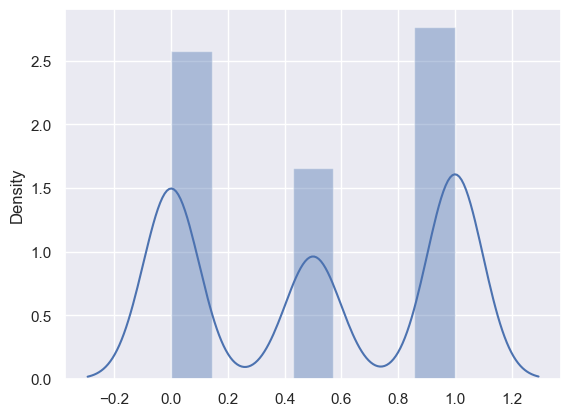

In [46]:
sns.set_theme();
ax = sns.distplot(bank)

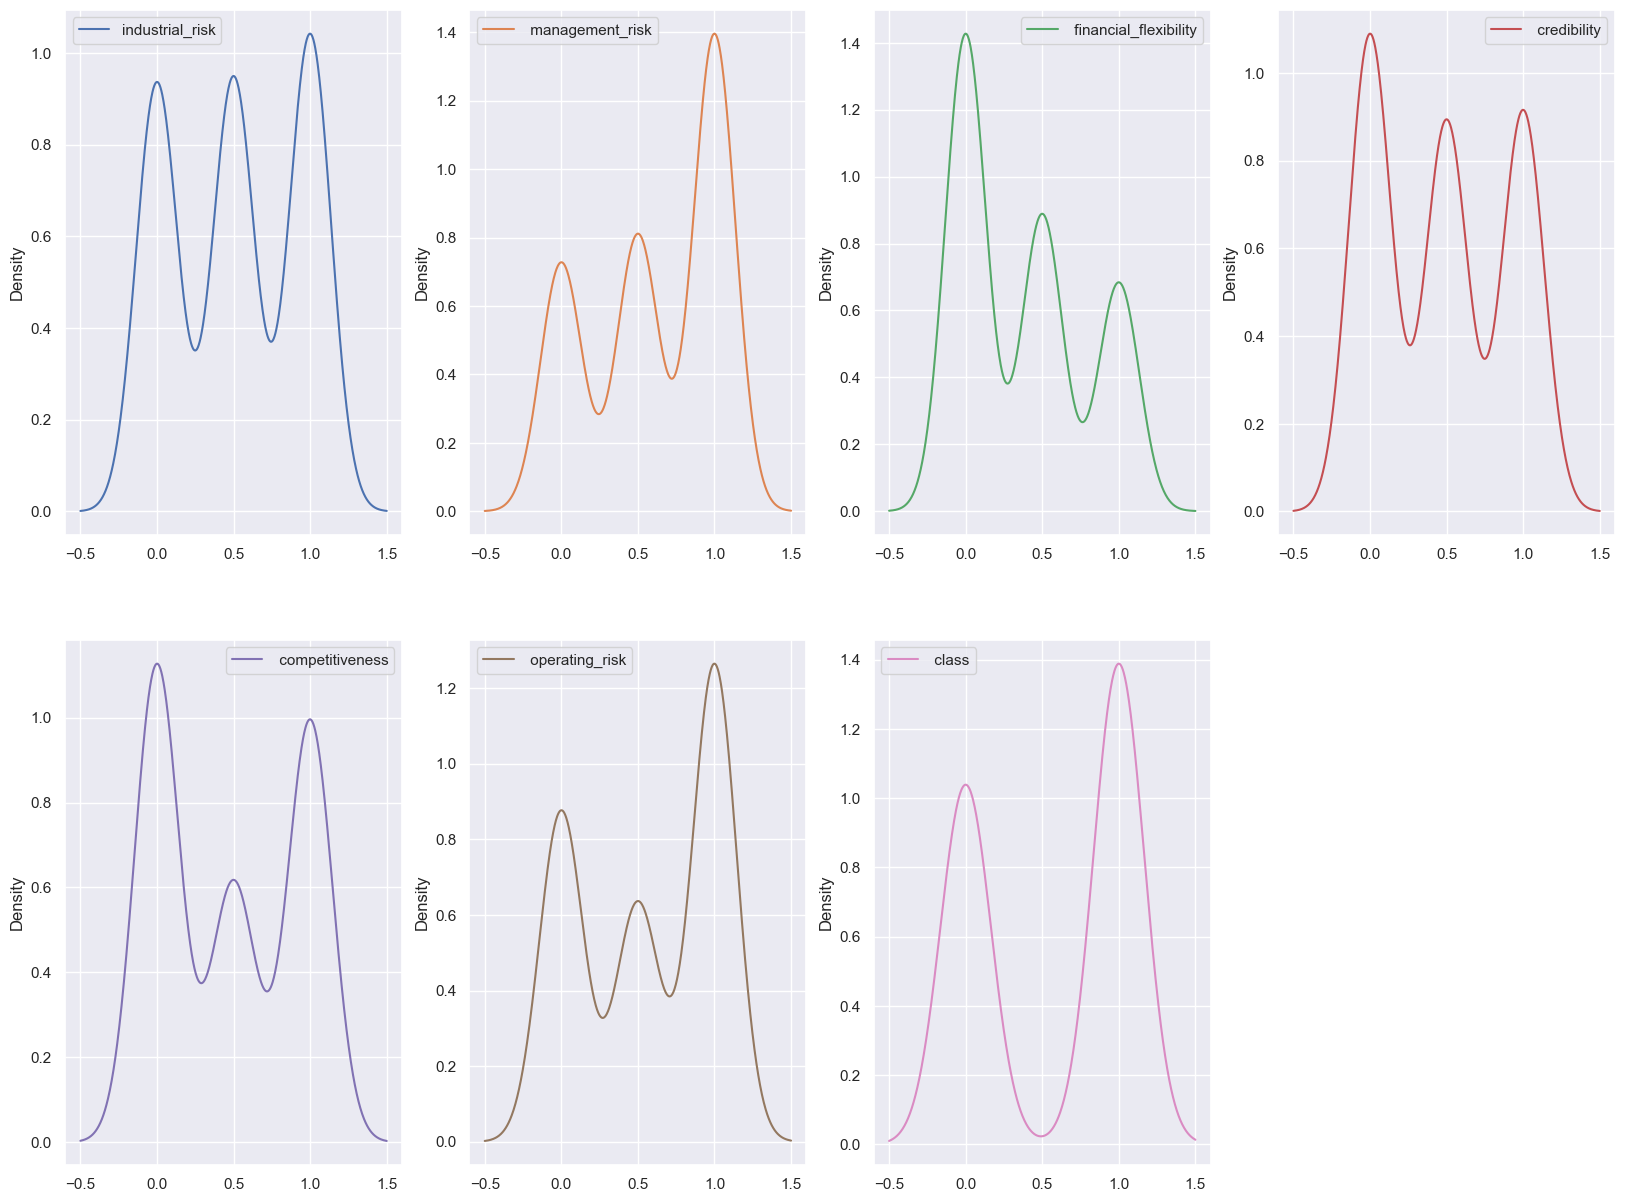

In [47]:
#Densityplot to observe the distribution of a variable in a dataset
bank.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(20,15))
plt.show()

<Axes: >

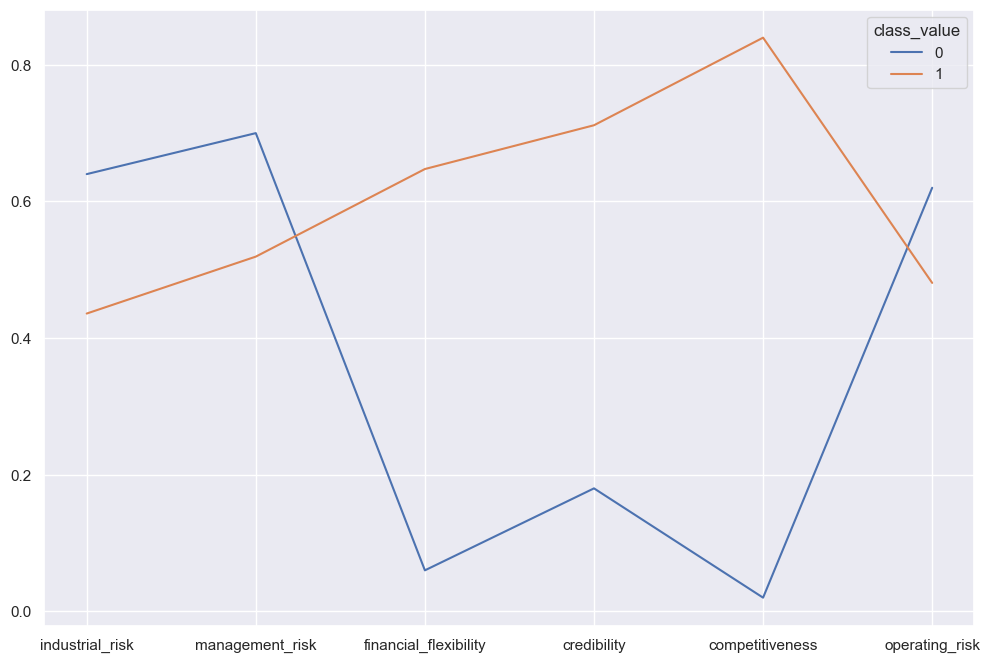

In [48]:
bank1.groupby('class_value')[features].mean().T.plot(figsize=(12,8))


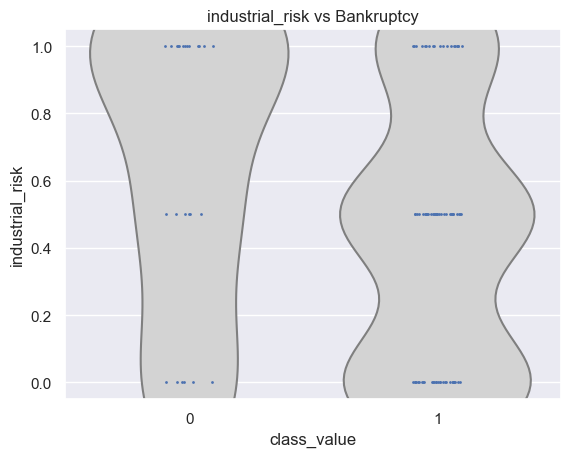

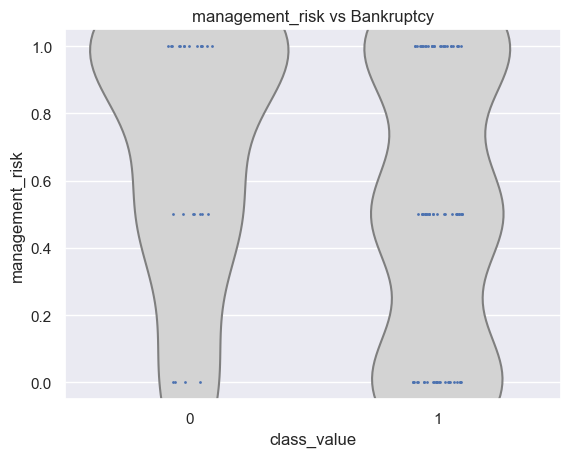

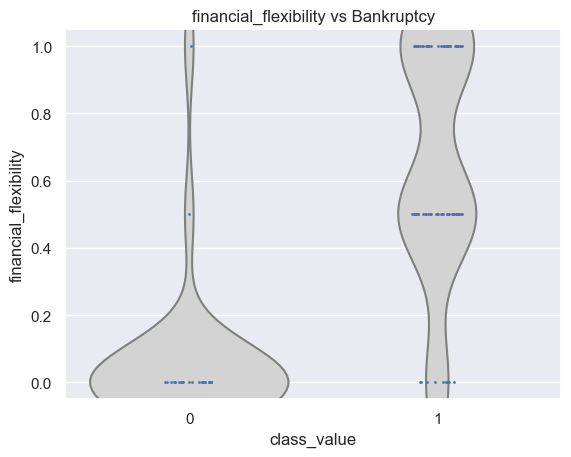

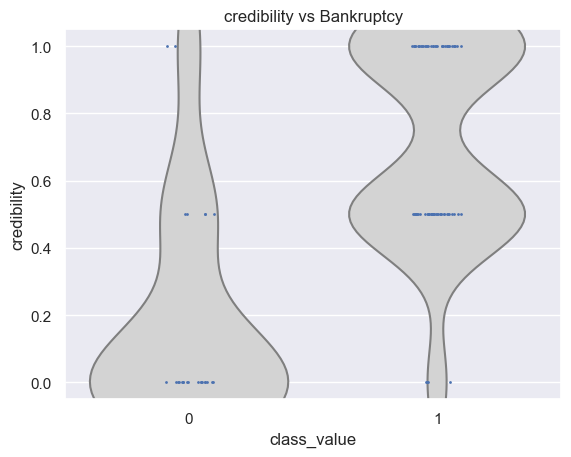

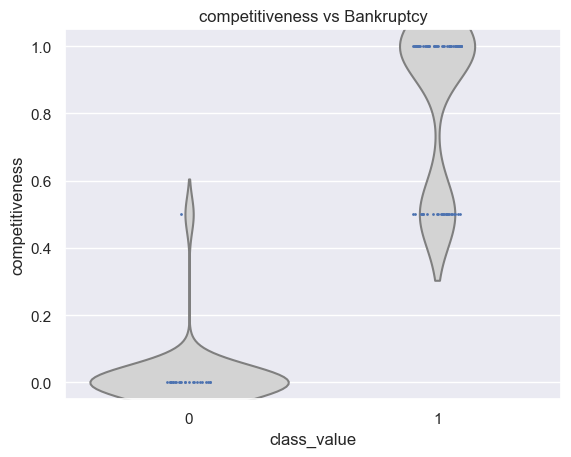

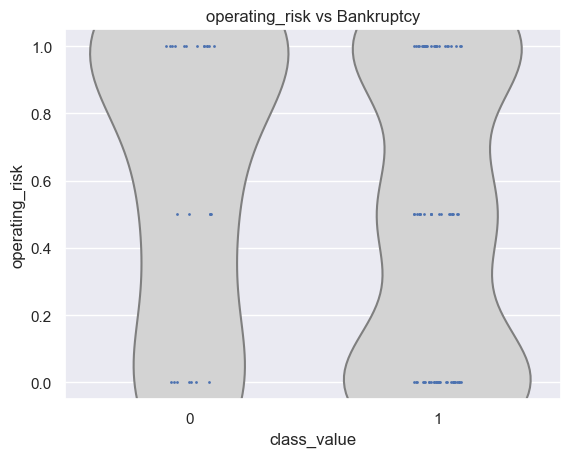

In [49]:
for feature in features:
    sns.violinplot(x='class_value', y=feature, data=bank1, inner=None, color='lightgray')
    sns.stripplot(x='class_value', y=feature, data=bank1, size=2, jitter=True)
    plt.ylabel(feature)
    plt.title("%s vs Bankruptcy" % feature)
    plt.show()

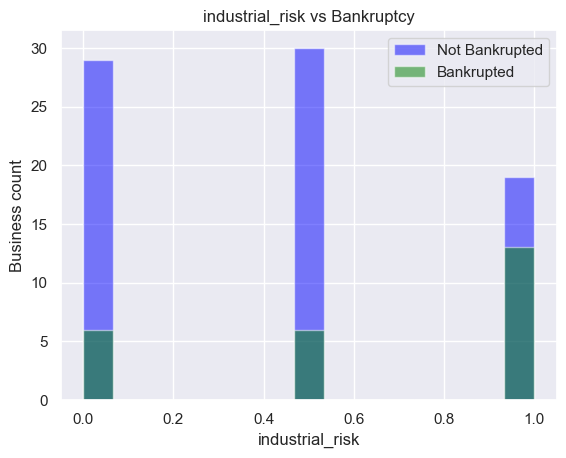

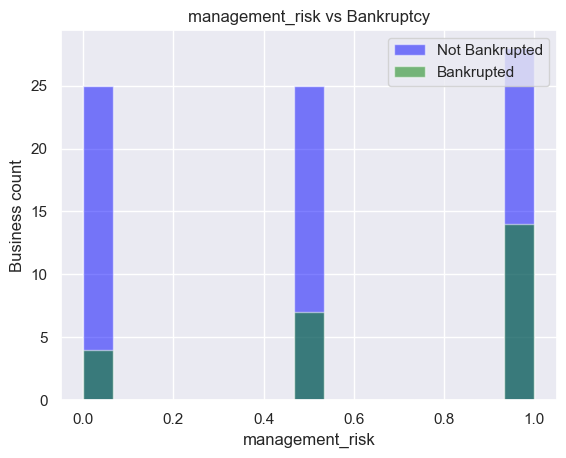

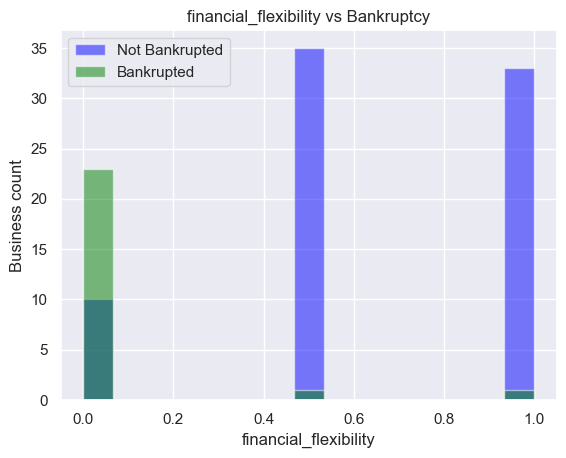

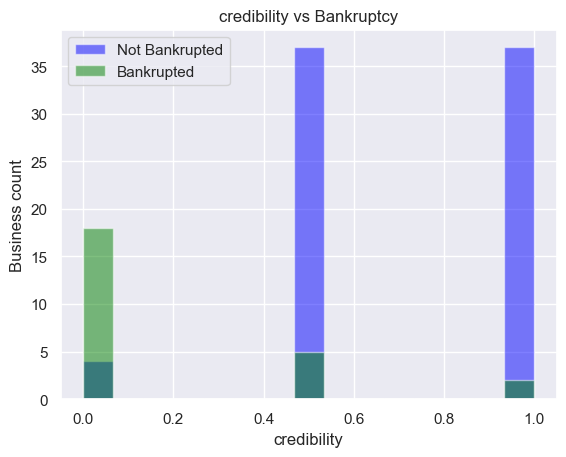

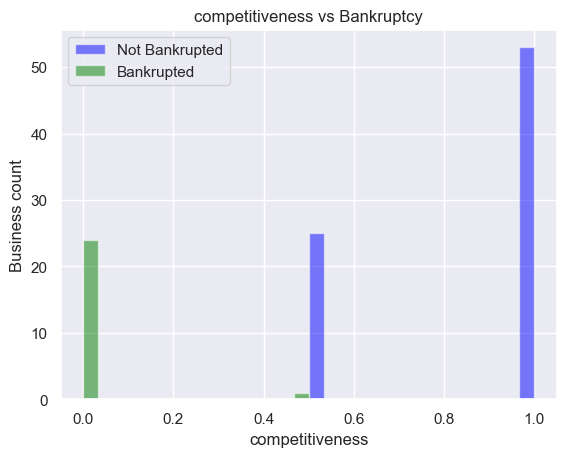

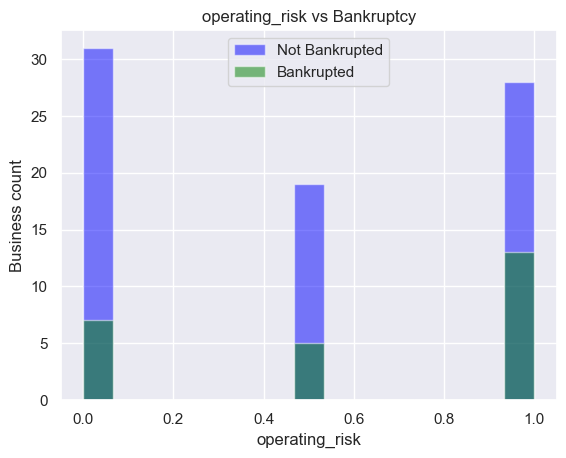

In [50]:
for feature in features:
    fig, ax = plt.subplots()

    ax.hist(bank1[bank1["class_value"]==1][feature], bins=15, alpha=0.5, color="blue", label="Not Bankrupted")
    ax.hist(bank1[bank1["class_value"]==0][feature], bins=15, alpha=0.5, color="green", label="Bankrupted")

    ax.set_xlabel(feature)
    ax.set_ylabel("Business count")
    ax.set_title("%s vs Bankruptcy"%feature)

    ax.legend();

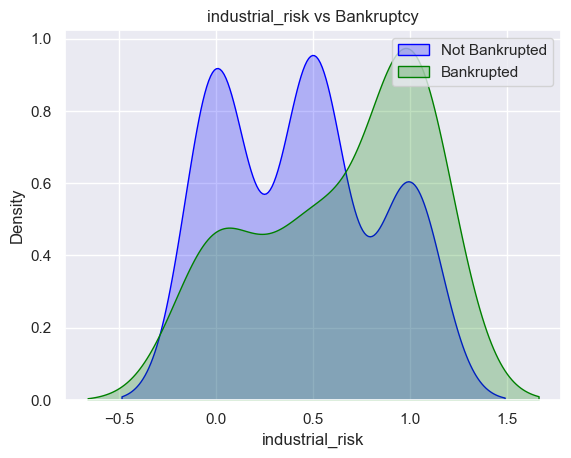

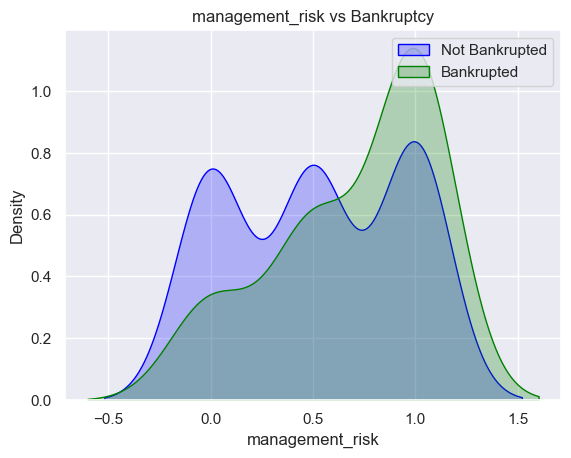

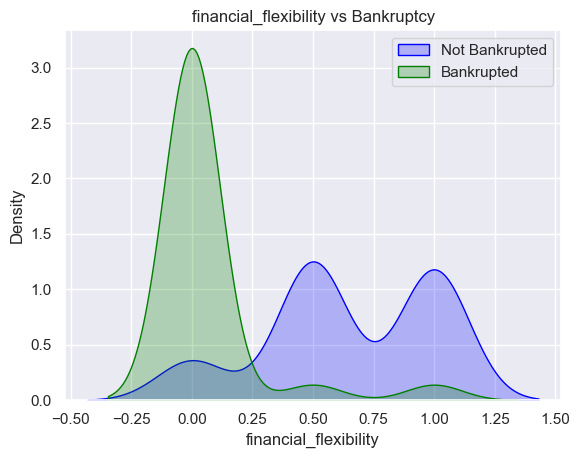

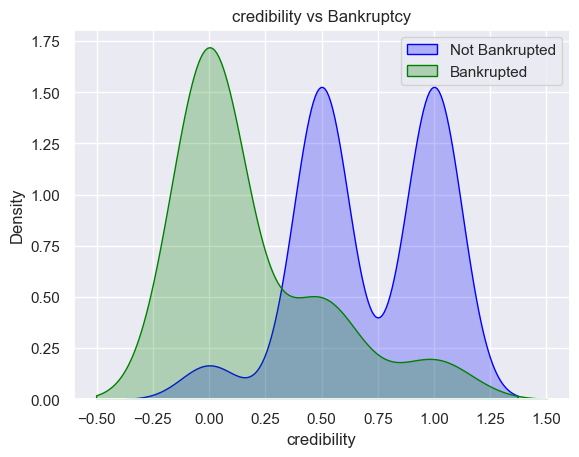

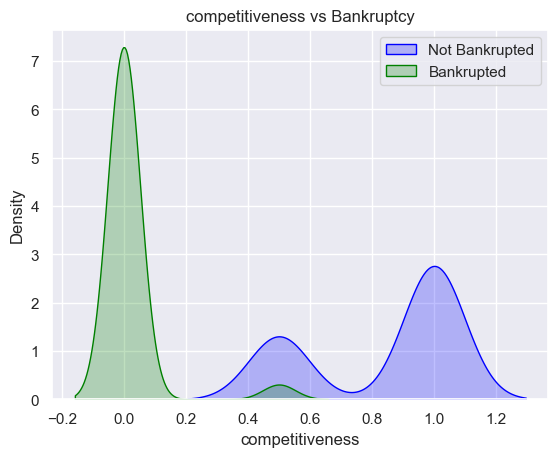

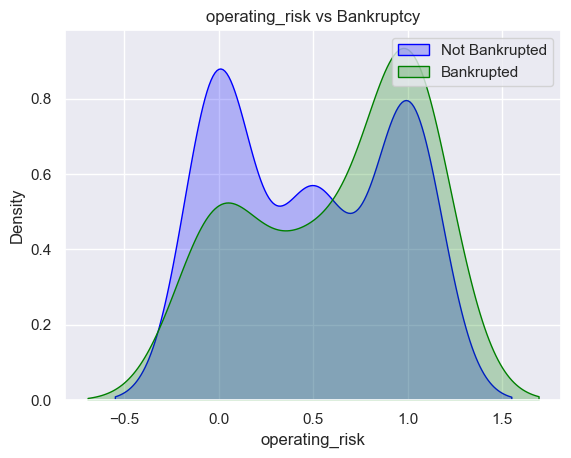

In [51]:
# Density Estimate Plots
for feature in features:
    fig, ax = plt.subplots()

    sns.kdeplot(bank1[bank1["class_value"]==1][feature], shade=True, color="blue", label="Not Bankrupted", ax=ax)
    sns.kdeplot(bank1[bank1["class_value"]==0][feature], shade=True, color="green", label="Bankrupted", ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.set_title("%s vs Bankruptcy"%feature)
    #fig.suptitle("Financial Flexibility vs. Bankruptcy");
    ax.legend();

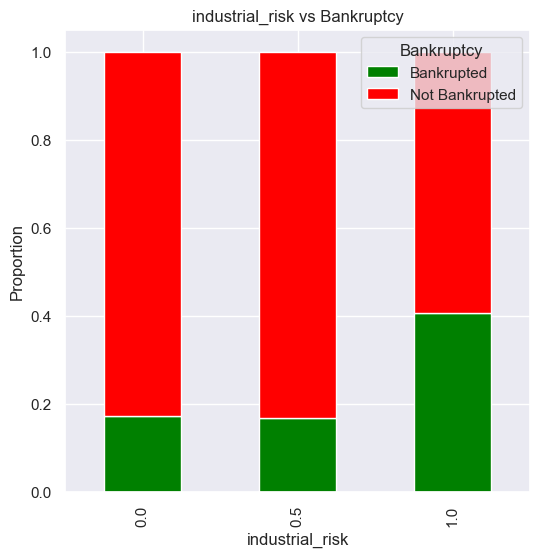

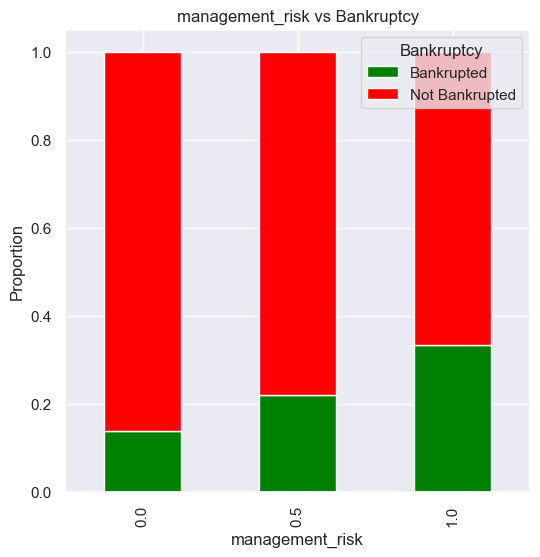

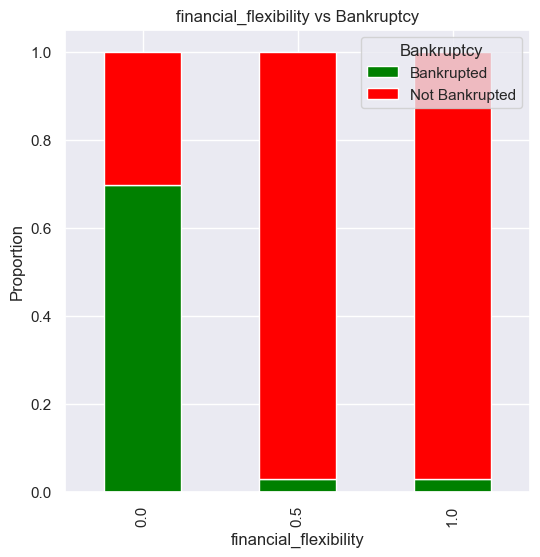

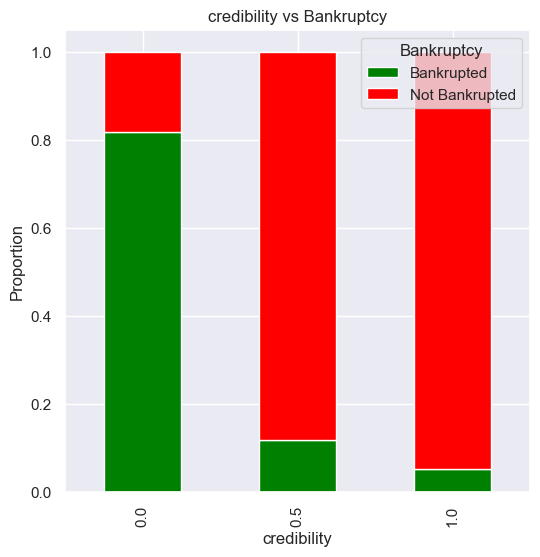

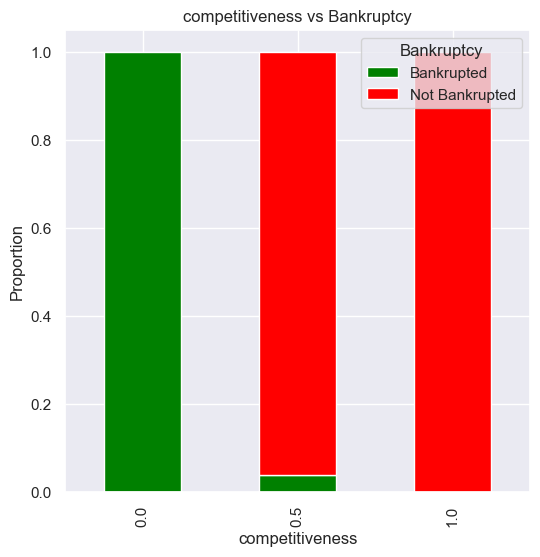

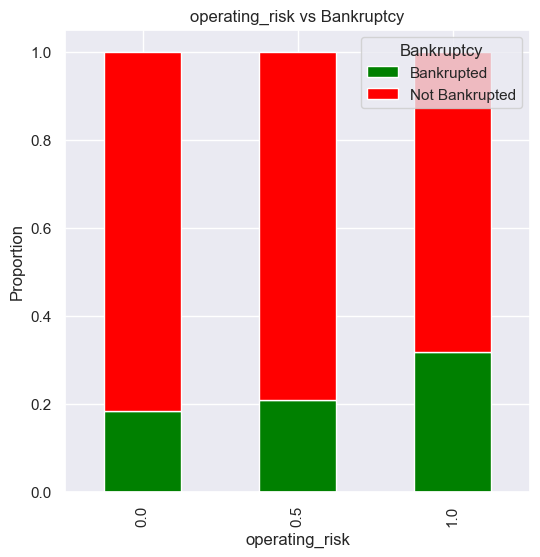

In [52]:
# Stacked Bar Charts for checking proportion
for feature in features:
    counts_df = bank1.groupby([feature, "class_value"])["competitiveness"].count().unstack()
    Bankruptcy_df = counts_df.T.div(counts_df.T.sum()).T
    g=Bankruptcy_df.plot(kind="bar", stacked=True, color=["green", "red"]).set(title="%s vs Bankruptcy"%feature)

    plt.gcf().set_size_inches(6,6)
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    plt.xlabel(feature)
    plt.ylabel("Proportion")

Model Building

In [53]:
bank1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [54]:
X=bank1.iloc[:,0:6]

In [55]:
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5
187,0.0,0.5,0.5,0.5,1.0,0.5
190,0.0,0.5,0.5,0.0,1.0,0.0
192,0.5,1.0,0.0,0.0,1.0,0.0


In [56]:
y=bank1["class_value"]

In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
185    1
187    1
190    1
192    1
194    1
Name: class_value, Length: 103, dtype: int32

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report, roc_auc_score, roc_curve

%matplotlib inline

In [61]:
# Logestic Regression Model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [62]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

log_train_acc = accuracy_score(y_train, y_pred_train)
log_test_acc = accuracy_score(y_test, y_pred_test)

log_train_f1 = f1_score(y_train, y_pred_train)
log_test_f1 = f1_score(y_test, y_pred_test)

log_train_prec = precision_score(y_train, y_pred_train)
log_test_prec = precision_score(y_test, y_pred_test)

log_train_roc = roc_auc_score(y_train, y_pred_train)
log_test_roc = roc_auc_score(y_test, y_pred_test)

log_train_cm = confusion_matrix(y_train, y_pred_train)
log_test_cm = confusion_matrix(y_test, y_pred_test)


In [63]:
#Printing all the meeasuring metric results
print('Logistic Regression training accuracy is', log_train_acc)
print('Logistic Regression testing accuracy is', log_test_acc)
print('--------------------------------------------------------')
print('Logistic Regression training F1 Score is', log_train_f1)
print('Logistic Regression testing F1 Score is', log_test_f1)
print('--------------------------------------------------------')
print('Logistic Regression training Precision is', log_train_prec)
print('Logistic Regression testing Precision is', log_test_prec)
print('--------------------------------------------------------')
print('Logistic Regression training ROC-AUC Score is', log_train_roc)
print('Logistic Regression testing ROC-AUC Score is', log_test_roc)
print('--------------------------------------------------------')
print('Logistic Regression training Confusion Matrix is')
print(log_train_cm)
print('--------------------------------------------------------')
print('Logistic Regression testing Confusion Matrix is')
print(log_test_cm)

Logistic Regression training accuracy is 0.9878048780487805
Logistic Regression testing accuracy is 1.0
--------------------------------------------------------
Logistic Regression training F1 Score is 0.9921259842519685
Logistic Regression testing F1 Score is 1.0
--------------------------------------------------------
Logistic Regression training Precision is 0.984375
Logistic Regression testing Precision is 1.0
--------------------------------------------------------
Logistic Regression training ROC-AUC Score is 0.9736842105263158
Logistic Regression testing ROC-AUC Score is 1.0
--------------------------------------------------------
Logistic Regression training Confusion Matrix is
[[18  1]
 [ 0 63]]
--------------------------------------------------------
Logistic Regression testing Confusion Matrix is
[[ 6  0]
 [ 0 15]]


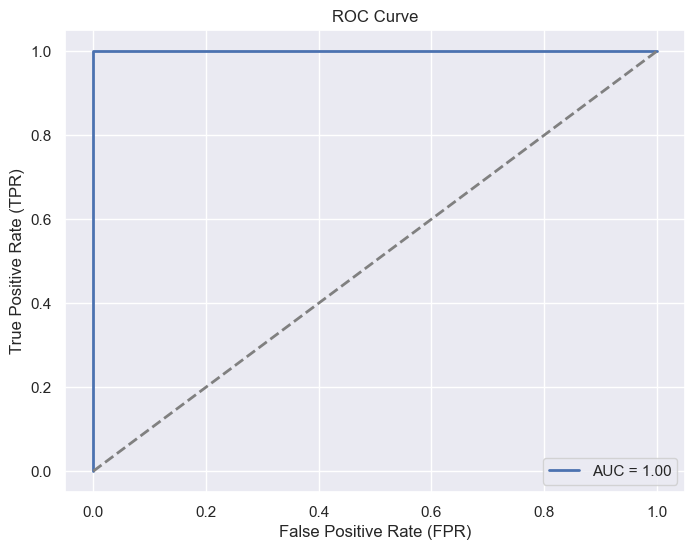

In [64]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {log_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [66]:
#Decision Tree Model
dec = DecisionTreeClassifier(max_depth=5)
monotonic_feature = 0
dec.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
# Training and Testing the model and Measuring Accuracies
y_pred_train_dec = dec.predict(X_train)
y_pred_test_dec = dec.predict(X_test)

dec_train_acc = accuracy_score(y_train, y_pred_train_dec)
dec_test_acc = accuracy_score(y_test, y_pred_test_dec)

dec_train_f1 = f1_score(y_train, y_pred_train_dec)
dec_test_f1 = f1_score(y_test, y_pred_test_dec)

dec_train_prec = precision_score(y_train, y_pred_train_dec)
dec_test_prec = precision_score(y_test, y_pred_test_dec)

dec_train_roc = roc_auc_score(y_train, y_pred_train_dec)
dec_test_roc = roc_auc_score(y_test, y_pred_test_dec)

dec_train_cm = confusion_matrix(y_train, y_pred_train_dec)
dec_test_cm = confusion_matrix(y_test, y_pred_test_dec)


In [68]:
#Printing all the meeasuring metric results
print('Decision tree training accuracy is', dec_train_acc)
print('Decision tree testing accuracy is', dec_test_acc)
print(" ")
print('Decision tree training F1 Score is', dec_train_f1)
print('Decision tree testing F1 Score is', dec_test_f1)
print(" ")
print('Decision tree training Precision is', dec_train_prec)
print('Decision tree testing Precision is', dec_test_prec)
print(" ")
print('Decision tree training ROC-AUC Score is', dec_train_roc)
print('Decision tree testing ROC-AUC Score is', dec_test_roc)
print(" ")
print('Decision tree training Confusion Matrix is')
print(dec_train_cm)
print(" ")
print('Decision tree testing Confusion Matrix is')
print(dec_test_cm)

Decision tree training accuracy is 1.0
Decision tree testing accuracy is 0.9523809523809523
 
Decision tree training F1 Score is 1.0
Decision tree testing F1 Score is 0.9655172413793104
 
Decision tree training Precision is 1.0
Decision tree testing Precision is 1.0
 
Decision tree training ROC-AUC Score is 1.0
Decision tree testing ROC-AUC Score is 0.9666666666666667
 
Decision tree training Confusion Matrix is
[[19  0]
 [ 0 63]]
 
Decision tree testing Confusion Matrix is
[[ 6  0]
 [ 1 14]]


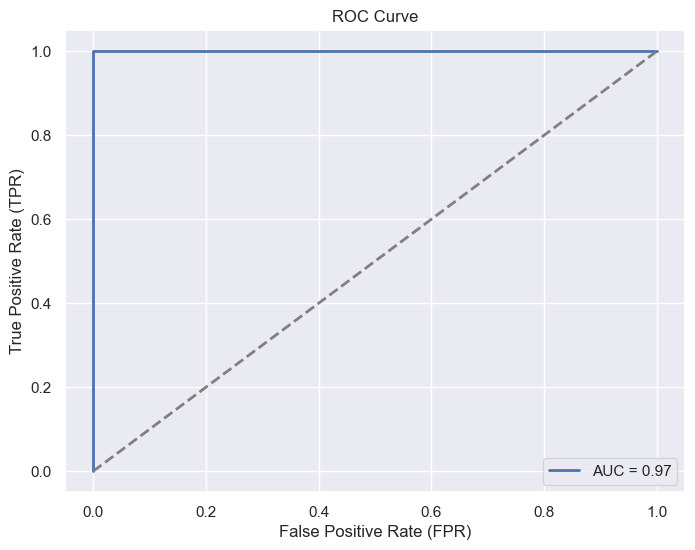

In [69]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {dec_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [71]:
#KNN Classifier Model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [72]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

knn_train_f1 = f1_score(y_train, y_pred_train)
knn_test_f1 = f1_score(y_test, y_pred_test)

knn_train_prec = precision_score(y_train, y_pred_train)
knn_test_prec = precision_score(y_test, y_pred_test)

knn_train_roc = roc_auc_score(y_train, y_pred_train)
knn_test_roc = roc_auc_score(y_test, y_pred_test)

knn_train_cm = confusion_matrix(y_train, y_pred_train)
knn_test_cm = confusion_matrix(y_test, y_pred_test)

In [73]:
#Printing all the meeasuring metric results
print('KNN training accuracy is', knn_train_acc)
print('KNN testing accuracy is', knn_test_acc)
print(" ")
print('KNN training F1 Score is', knn_train_f1)
print('KNN testing F1 Score is', knn_test_f1)
print(" ")
print('KNN training Precision is', knn_train_prec)
print('KNN testing Precision is', knn_test_prec)
print(" ")
print('KNN training ROC-AUC Score is', knn_train_roc)
print('KNN testing ROC-AUC Score is', knn_test_roc)
print(" ")
print('KNN training Confusion Matrix is')
print(knn_train_cm)
print(" ")
print('KNN testing Confusion Matrix is')
print(knn_test_cm)

KNN training accuracy is 1.0
KNN testing accuracy is 1.0
 
KNN training F1 Score is 1.0
KNN testing F1 Score is 1.0
 
KNN training Precision is 1.0
KNN testing Precision is 1.0
 
KNN training ROC-AUC Score is 1.0
KNN testing ROC-AUC Score is 1.0
 
KNN training Confusion Matrix is
[[19  0]
 [ 0 63]]
 
KNN testing Confusion Matrix is
[[ 6  0]
 [ 0 15]]


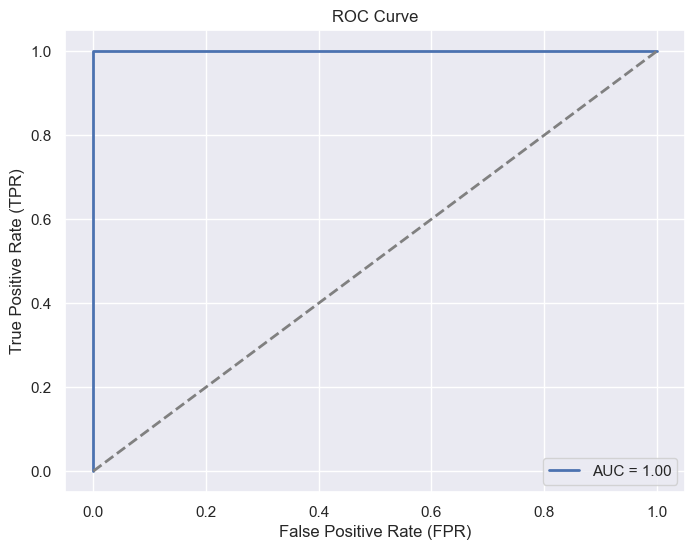

In [74]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {knn_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [76]:
#Random Forest Classifier Model
rnd = RandomForestClassifier(max_depth=5)
rnd.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [77]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = rnd.predict(X_train)
y_pred_test = rnd.predict(X_test)

rnd_train_acc = accuracy_score(y_train, y_pred_train)
rnd_test_acc = accuracy_score(y_test, y_pred_test)

rnd_train_f1 = f1_score(y_train, y_pred_train)
rnd_test_f1 = f1_score(y_test, y_pred_test)

rnd_train_prec = precision_score(y_train, y_pred_train)
rnd_test_prec = precision_score(y_test, y_pred_test)

rnd_train_roc = roc_auc_score(y_train, y_pred_train)
rnd_test_roc = roc_auc_score(y_test, y_pred_test)

rnd_train_cm = confusion_matrix(y_train, y_pred_train)
rnd_test_cm = confusion_matrix(y_test, y_pred_test)

In [78]:
#Printing all the meeasuring metric results
print('Random Forest training accuracy is', rnd_train_acc)
print('Random Forest testing accuracy is', rnd_test_acc)
print(" ")
print('Random Forest training F1 Score is', rnd_train_f1)
print('Random Forest testing F1 Score is', rnd_test_f1)
print(" ")
print('Random Forest training Precision is', rnd_train_prec)
print('Random Forest testing Precision is', rnd_test_prec)
print(" ")
print('Random Forest training ROC-AUC Score is', rnd_train_roc)
print('Random Forest testing ROC-AUC Score is', rnd_test_roc)
print(" ")
print('Random Forest training Confusion Matrix is')
print(rnd_train_cm)
print(" ")
print('Random Forest testing Confusion Matrix is')
print(rnd_test_cm)

Random Forest training accuracy is 1.0
Random Forest testing accuracy is 1.0
 
Random Forest training F1 Score is 1.0
Random Forest testing F1 Score is 1.0
 
Random Forest training Precision is 1.0
Random Forest testing Precision is 1.0
 
Random Forest training ROC-AUC Score is 1.0
Random Forest testing ROC-AUC Score is 1.0
 
Random Forest training Confusion Matrix is
[[19  0]
 [ 0 63]]
 
Random Forest testing Confusion Matrix is
[[ 6  0]
 [ 0 15]]


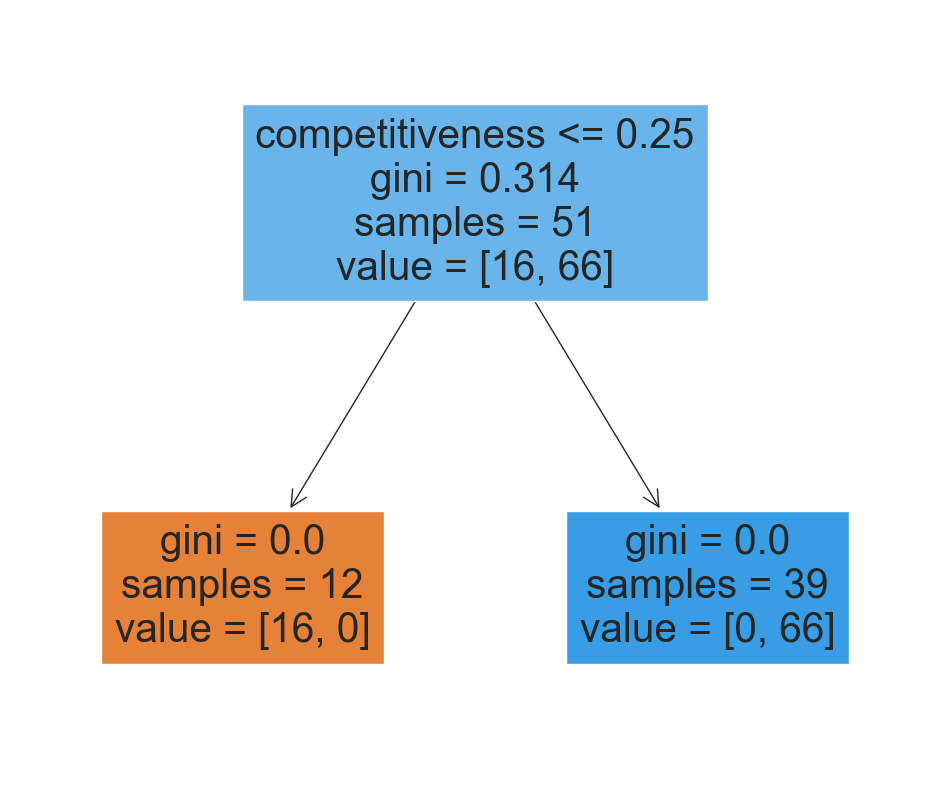

In [79]:
#Ploting decision tree using Random forest model
fig = plt.figure(figsize=(12,10))
_ = tree.plot_tree(rnd.estimators_[9], feature_names= list(X),filled=True, max_depth=5)

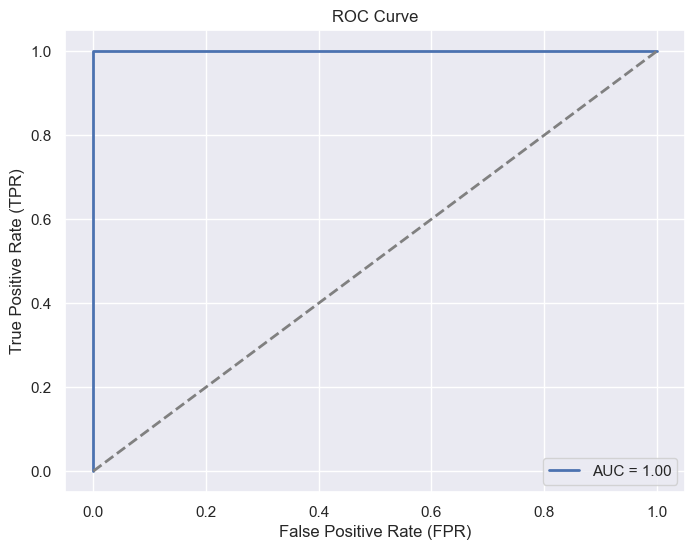

In [80]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {rnd_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [82]:
#Bagging Classifier
bag = BaggingClassifier(estimator=RandomForestClassifier(max_depth = 5), n_estimators=10)
bag.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5))

In [83]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = bag.predict(X_train)
y_pred_test = bag.predict(X_test)

bag_train_acc = accuracy_score(y_train, y_pred_train)
bag_test_acc = accuracy_score(y_test, y_pred_test)

bag_train_f1 = f1_score(y_train, y_pred_train)
bag_test_f1 = f1_score(y_test, y_pred_test)

bag_train_prec = precision_score(y_train, y_pred_train)
bag_test_prec = precision_score(y_test, y_pred_test)

bag_train_roc = roc_auc_score(y_train, y_pred_train)
bag_test_roc = roc_auc_score(y_test, y_pred_test)

bag_train_cm = confusion_matrix(y_train, y_pred_train)
bag_test_cm = confusion_matrix(y_test, y_pred_test)

In [84]:
#Printing all the meeasuring metric results
print('Bagging training accuracy is', bag_train_acc)
print('Bagging testing accuracy is', bag_test_acc)
print(" ")
print('Bagging training F1 Score is', bag_train_f1)
print('Bagging testing F1 Score is', bag_test_f1)
print(" ")
print('Bagging training Precision is', bag_train_prec)
print('Bagging testing Precision is', bag_test_prec)
print(" ")
print('Bagging training ROC-AUC Score is', bag_train_roc)
print('Bagging testing ROC-AUC Score is', bag_test_roc)
print(" ")
print('Bagging training Confusion Matrix is')
print(bag_train_cm)
print(" ")
print('Bagging testing Confusion Matrix is')
print(bag_test_cm)

Bagging training accuracy is 1.0
Bagging testing accuracy is 1.0
 
Bagging training F1 Score is 1.0
Bagging testing F1 Score is 1.0
 
Bagging training Precision is 1.0
Bagging testing Precision is 1.0
 
Bagging training ROC-AUC Score is 1.0
Bagging testing ROC-AUC Score is 1.0
 
Bagging training Confusion Matrix is
[[19  0]
 [ 0 63]]
 
Bagging testing Confusion Matrix is
[[ 6  0]
 [ 0 15]]


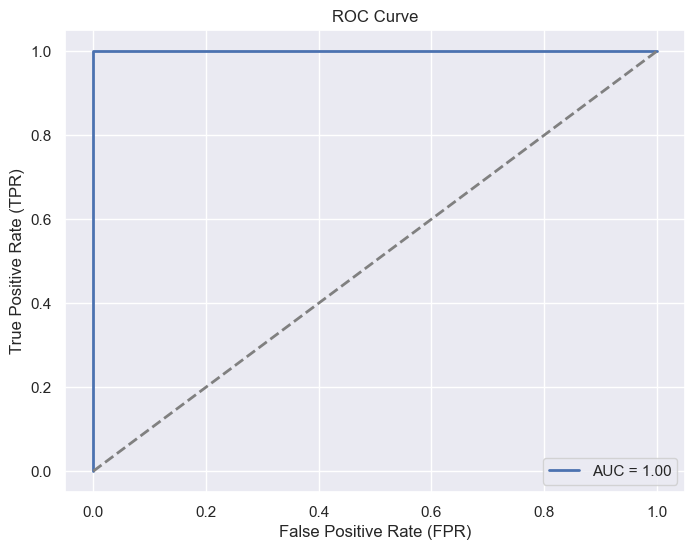

In [85]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {bag_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [87]:
#Ada Boost
ada = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))

In [88]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)

ada_train_acc = accuracy_score(y_train, y_pred_train)
ada_test_acc = accuracy_score(y_test, y_pred_test)

ada_train_f1 = f1_score(y_train, y_pred_train)
ada_test_f1 = f1_score(y_test, y_pred_test)

ada_train_prec = precision_score(y_train, y_pred_train)
ada_test_prec = precision_score(y_test, y_pred_test)

ada_train_roc = roc_auc_score(y_train, y_pred_train)
ada_test_roc = roc_auc_score(y_test, y_pred_test)

ada_train_cm = confusion_matrix(y_train, y_pred_train)
ada_test_cm = confusion_matrix(y_test, y_pred_test)

In [89]:
#Printing all the meeasuring metric results
print('AdaBoost training accuracy is', ada_train_acc)
print('AdaBoost testing accuracy is', ada_test_acc)
print(" ")
print('AdaBoost training F1 Score is', ada_train_f1)
print('AdaBoost testing F1 Score is', ada_test_f1)
print(" ")
print('AdaBoost training Precision is', ada_train_prec)
print('AdaBoost testing Precision is', ada_test_prec)
print(" ")
print('AdaBoost training ROC-AUC Score is', ada_train_roc)
print('AdaBoost testing ROC-AUC Score is', ada_test_roc)
print(" ")
print('AdaBoost training Confusion Matrix is')
print(ada_train_cm)
print(" ")
print('AdaBoost testing Confusion Matrix is')
print(ada_test_cm)

AdaBoost training accuracy is 1.0
AdaBoost testing accuracy is 1.0
 
AdaBoost training F1 Score is 1.0
AdaBoost testing F1 Score is 1.0
 
AdaBoost training Precision is 1.0
AdaBoost testing Precision is 1.0
 
AdaBoost training ROC-AUC Score is 1.0
AdaBoost testing ROC-AUC Score is 1.0
 
AdaBoost training Confusion Matrix is
[[19  0]
 [ 0 63]]
 
AdaBoost testing Confusion Matrix is
[[ 6  0]
 [ 0 15]]


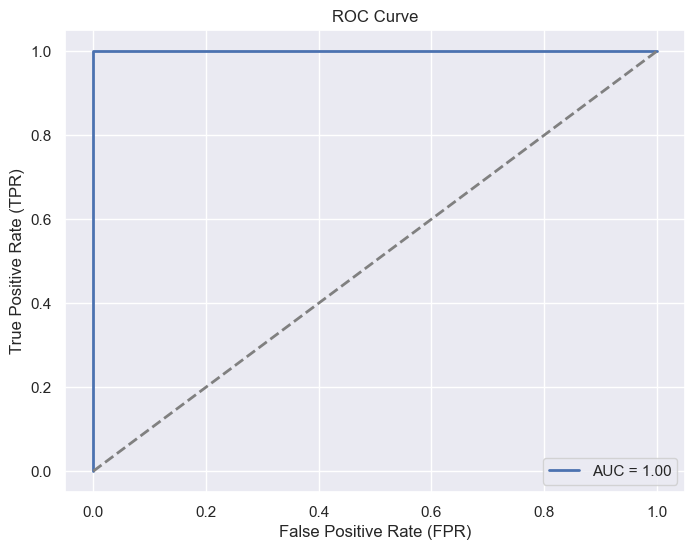

In [90]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {ada_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [92]:
#Gradient Boosting
grad = GradientBoostingClassifier(learning_rate=0.01)
grad.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [93]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = grad.predict(X_train)
y_pred_test = grad.predict(X_test)

grad_train_acc = accuracy_score(y_train, y_pred_train)
grad_test_acc = accuracy_score(y_test, y_pred_test)

grad_train_f1 = f1_score(y_train, y_pred_train)
grad_test_f1 = f1_score(y_test, y_pred_test)

grad_train_prec = precision_score(y_train, y_pred_train)
grad_test_prec = precision_score(y_test, y_pred_test)

grad_train_roc = roc_auc_score(y_train, y_pred_train)
grad_test_roc = roc_auc_score(y_test, y_pred_test)

grad_train_cm = confusion_matrix(y_train, y_pred_train)
grad_test_cm = confusion_matrix(y_test, y_pred_test)

In [94]:
#Printing all the meeasuring metric results
print('Gradient Boost training accuracy is', grad_train_acc)
print('Gradient Boost testing accuracy is', grad_test_acc)
print(" ")
print('Gradient Boost training F1 Score is', grad_train_f1)
print('Gradient Boost testing F1 Score is', grad_test_f1)
print(" ")
print('Gradient Boost training Precision is', grad_train_prec)
print('Gradient Boost testing Precision is', grad_test_prec)
print(" ")
print('Gradient Boost training ROC-AUC Score is', grad_train_roc)
print('Gradient Boost testing ROC-AUC Score is', grad_test_roc)
print(" ")
print('Gradient Boost training Confusion Matrix is')
print(grad_train_cm)
print(" ")
print('Gradient Boost testing Confusion Matrix is')
print(grad_test_cm)

Gradient Boost training accuracy is 1.0
Gradient Boost testing accuracy is 0.9523809523809523
 
Gradient Boost training F1 Score is 1.0
Gradient Boost testing F1 Score is 0.9655172413793104
 
Gradient Boost training Precision is 1.0
Gradient Boost testing Precision is 1.0
 
Gradient Boost training ROC-AUC Score is 1.0
Gradient Boost testing ROC-AUC Score is 0.9666666666666667
 
Gradient Boost training Confusion Matrix is
[[19  0]
 [ 0 63]]
 
Gradient Boost testing Confusion Matrix is
[[ 6  0]
 [ 1 14]]


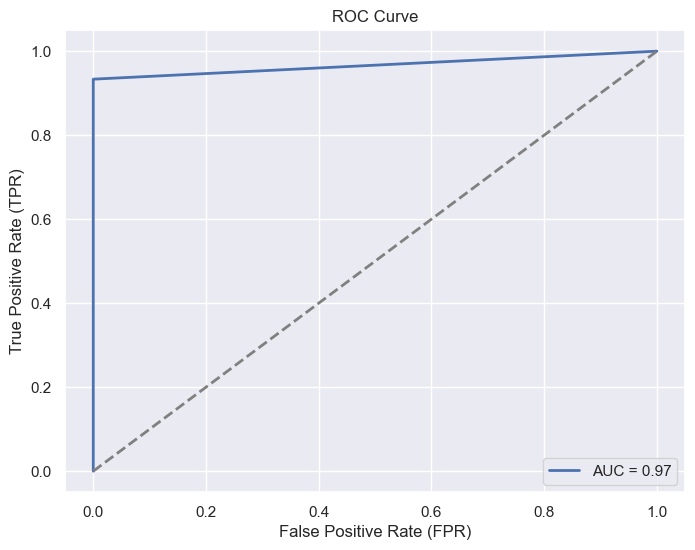

In [95]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {grad_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [97]:
svcl = SVC(kernel= "linear")
svcl.fit(X_train , y_train)

SVC(kernel='linear')

In [98]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = svcl.predict(X_train)
y_pred_test = svcl.predict(X_test)

svcl_train_acc = accuracy_score(y_train, y_pred_train)
svcl_test_acc = accuracy_score(y_test, y_pred_test)

svcl_train_f1 = f1_score(y_train, y_pred_train)
svcl_test_f1 = f1_score(y_test, y_pred_test)

svcl_train_prec = precision_score(y_train, y_pred_train)
svcl_test_prec = precision_score(y_test, y_pred_test)

svcl_train_roc = roc_auc_score(y_train, y_pred_train)
svcl_test_roc = roc_auc_score(y_test, y_pred_test)

svcl_train_cm = confusion_matrix(y_train, y_pred_train)
svcl_test_cm = confusion_matrix(y_test, y_pred_test)

In [99]:

#Printing all the meeasuring metric results
print('SVC Linear Kernel training accuracy is', svcl_train_acc)
print('SVC Linear Kernel testing accuracy is', svcl_test_acc)
print(" ")
print('SVC Linear Kernel training F1 Score is', svcl_train_f1)
print('SVC Linear Kernel testing F1 Score is', svcl_test_f1)
print(" ")
print('SVC Linear Kernel training Precision is', svcl_train_prec)
print('SVC Linear Kernel testing Precision is', svcl_test_prec)
print(" ")
print('SVC Linear Kernel training ROC-AUC Score is', svcl_train_roc)
print('SVC Linear Kernel testing ROC-AUC Score is', svcl_test_roc)
print(" ")
print('SVC Linear Kernel training Confusion Matrix is')
print(svcl_train_cm)
print(" ")
print('SVC Linear Kernel testing Confusion Matrix is')
print(svcl_test_cm)

SVC Linear Kernel training accuracy is 0.9878048780487805
SVC Linear Kernel testing accuracy is 1.0
 
SVC Linear Kernel training F1 Score is 0.9921259842519685
SVC Linear Kernel testing F1 Score is 1.0
 
SVC Linear Kernel training Precision is 0.984375
SVC Linear Kernel testing Precision is 1.0
 
SVC Linear Kernel training ROC-AUC Score is 0.9736842105263158
SVC Linear Kernel testing ROC-AUC Score is 1.0
 
SVC Linear Kernel training Confusion Matrix is
[[18  1]
 [ 0 63]]
 
SVC Linear Kernel testing Confusion Matrix is
[[ 6  0]
 [ 0 15]]


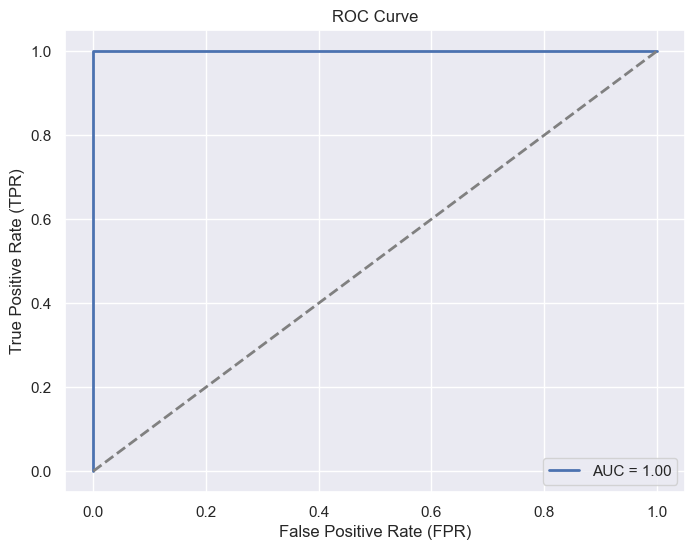

In [100]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcl_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [102]:
svcp = SVC(kernel= "poly")
svcp.fit(X_train , y_train)

SVC(kernel='poly')

In [103]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = svcp.predict(X_train)
y_pred_test = svcp.predict(X_test)

svcp_train_acc = accuracy_score(y_train, y_pred_train)
svcp_test_acc = accuracy_score(y_test, y_pred_test)

svcp_train_f1 = f1_score(y_train, y_pred_train)
svcp_test_f1 = f1_score(y_test, y_pred_test)

svcp_train_prec = precision_score(y_train, y_pred_train)
svcp_test_prec = precision_score(y_test, y_pred_test)

svcp_train_roc = roc_auc_score(y_train, y_pred_train)
svcp_test_roc = roc_auc_score(y_test, y_pred_test)

svcp_train_cm = confusion_matrix(y_train, y_pred_train)
svcp_test_cm = confusion_matrix(y_test, y_pred_test)

In [104]:
#Printing all the meeasuring metric results
print('SVC Polynomial Kernel training accuracy is', svcp_train_acc)
print('SVC Polynomial Kernel testing accuracy is', svcp_test_acc)
print(" ")
print('SVC Polynomial Kernel training F1 Score is', svcp_train_f1)
print('SVC Polynomial Kernel testing F1 Score is', svcp_test_f1)
print(" ")
print('SVC Polynomial Kernel training Precision is', svcp_train_prec)
print('SVC Polynomial Kernel testing Precision is', svcp_test_prec)
print(" ")
print('SVC Polynomial Kernel training ROC-AUC Score is', svcp_train_roc)
print('SVC Polynomial Kernel testing ROC-AUC Score is', svcp_test_roc)
print(" ")
print('SVC Polynomial Kernel training Confusion Matrix is')
print(svcp_train_cm)
print(" ")
print('SVC Polynomial Kernel testing Confusion Matrix is')
print(svcp_test_cm)

SVC Polynomial Kernel training accuracy is 1.0
SVC Polynomial Kernel testing accuracy is 1.0
 
SVC Polynomial Kernel training F1 Score is 1.0
SVC Polynomial Kernel testing F1 Score is 1.0
 
SVC Polynomial Kernel training Precision is 1.0
SVC Polynomial Kernel testing Precision is 1.0
 
SVC Polynomial Kernel training ROC-AUC Score is 1.0
SVC Polynomial Kernel testing ROC-AUC Score is 1.0
 
SVC Polynomial Kernel training Confusion Matrix is
[[19  0]
 [ 0 63]]
 
SVC Polynomial Kernel testing Confusion Matrix is
[[ 6  0]
 [ 0 15]]


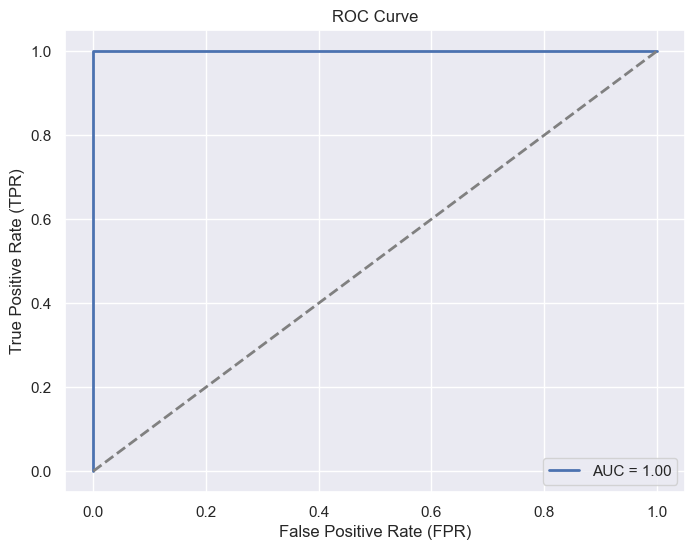

In [105]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcp_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [107]:
svcr = SVC(C= 20, gamma = 50)
svcr.fit(X_train , y_train)

SVC(C=20, gamma=50)

In [108]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = svcr.predict(X_train)
y_pred_test = svcr.predict(X_test)

svcr_train_acc = accuracy_score(y_train, y_pred_train)
svcr_test_acc = accuracy_score(y_test, y_pred_test)

svcr_train_f1 = f1_score(y_train, y_pred_train)
svcr_test_f1 = f1_score(y_test, y_pred_test)

svcr_train_prec = precision_score(y_train, y_pred_train)
svcr_test_prec = precision_score(y_test, y_pred_test)

svcr_train_roc = roc_auc_score(y_train, y_pred_train)
svcr_test_roc = roc_auc_score(y_test, y_pred_test)

svcr_train_cm = confusion_matrix(y_train, y_pred_train)
svcr_test_cm = confusion_matrix(y_test, y_pred_test)

In [109]:
#Printing all the meeasuring metric results
print('SVC RBF Kernel training accuracy is', svcr_train_acc)
print('SVC RBF Kernel testing accuracy is', svcr_test_acc)
print(" ")
print('SVC RBF Kernel training F1 Score is', svcr_train_f1)
print('SVC RBF Kernel testing F1 Score is', svcr_test_f1)
print(" ")
print('SVC RBF Kernel training Precision is', svcr_train_prec)
print('SVC RBF Kernel testing Precision is', svcr_test_prec)
print(" ")
print('SVC RBF Kernel training ROC-AUC Score is', svcr_train_roc)
print('SVC RBF Kernel testing ROC-AUC Score is', svcr_test_roc)
print(" ")
print('SVC RBF Kernel training Confusion Matrix is')
print(svcr_train_cm)
print(" ")
print('SVC RBF Kernel testing Confusion Matrix is')
print(svcr_test_cm)

SVC RBF Kernel training accuracy is 1.0
SVC RBF Kernel testing accuracy is 0.7142857142857143
 
SVC RBF Kernel training F1 Score is 1.0
SVC RBF Kernel testing F1 Score is 0.8333333333333334
 
SVC RBF Kernel training Precision is 1.0
SVC RBF Kernel testing Precision is 0.7142857142857143
 
SVC RBF Kernel training ROC-AUC Score is 1.0
SVC RBF Kernel testing ROC-AUC Score is 0.5
 
SVC RBF Kernel training Confusion Matrix is
[[19  0]
 [ 0 63]]
 
SVC RBF Kernel testing Confusion Matrix is
[[ 0  6]
 [ 0 15]]


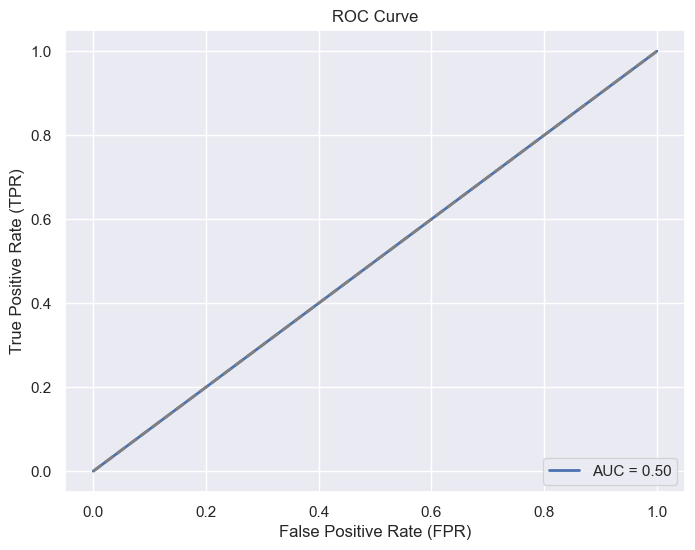

In [110]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcr_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [112]:
estimators = [('log', LogisticRegression(max_iter=500)), ('rnd', RandomForestClassifier(max_depth=5)), ('svcr', SVC(C= 20, gamma = 50))]
stack = StackingClassifier(estimators=estimators)
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('log', LogisticRegression(max_iter=500)),
                               ('rnd', RandomForestClassifier(max_depth=5)),
                               ('svcr', SVC(C=20, gamma=50))])

In [113]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)

stack_train_acc = accuracy_score(y_train, y_pred_train)
stack_test_acc = accuracy_score(y_test, y_pred_test)

stack_train_f1 = f1_score(y_train, y_pred_train)
stack_test_f1 = f1_score(y_test, y_pred_test)

stack_train_prec = precision_score(y_train, y_pred_train)
stack_test_prec = precision_score(y_test, y_pred_test)

stack_train_roc = roc_auc_score(y_train, y_pred_train)
stack_test_roc = roc_auc_score(y_test, y_pred_test)

stack_train_cm = confusion_matrix(y_train, y_pred_train)
stack_test_cm = confusion_matrix(y_test, y_pred_test)

In [114]:
#Printing all the meeasuring metric results
print('Stacking training accuracy is', stack_train_acc)
print('Stacking testing accuracy is', stack_test_acc)
print()
print('Stacking training F1 Score is', stack_train_f1)
print('Stacking testing F1 Score is', stack_test_f1)
print()
print('Stacking training Precision is', stack_train_prec)
print('Stacking testing Precision is', stack_test_prec)
print()
print('Stacking training ROC-AUC Score is', stack_train_roc)
print('Stacking testing ROC-AUC Score is', stack_test_roc)
print()
print('Stacking training Confusion Matrix is')
print(stack_train_cm)
print()
print('Stacking testing Confusion Matrix is')
print(stack_test_cm)

Stacking training accuracy is 1.0
Stacking testing accuracy is 1.0

Stacking training F1 Score is 1.0
Stacking testing F1 Score is 1.0

Stacking training Precision is 1.0
Stacking testing Precision is 1.0

Stacking training ROC-AUC Score is 1.0
Stacking testing ROC-AUC Score is 1.0

Stacking training Confusion Matrix is
[[19  0]
 [ 0 63]]

Stacking testing Confusion Matrix is
[[ 6  0]
 [ 0 15]]


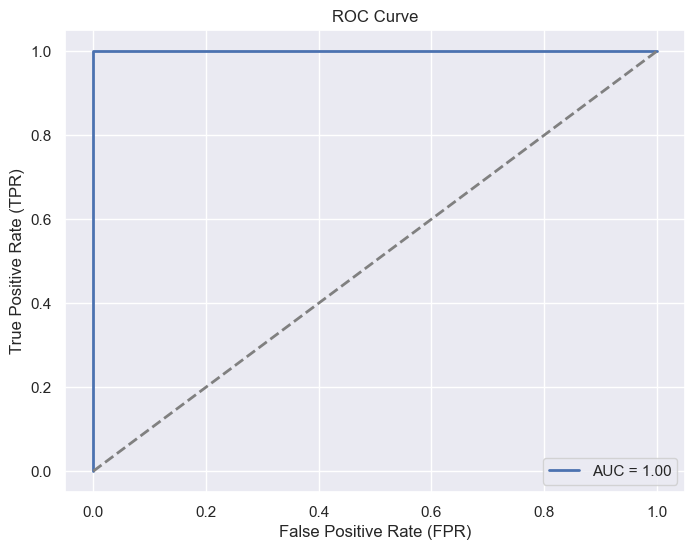

In [115]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Ploting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {stack_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [116]:
results = {
    'Model Name': ['Logistic Regression','Decision Tree', 'KNN', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boost', 'SVC Linear Kernel', 'SVC Polynomial Kernel', 'SVC RBF Kernel', 'Stacking'],
    'Training Accuracy': [log_train_acc, dec_train_acc, knn_train_acc, rnd_train_acc, bag_train_acc, ada_train_acc, grad_train_acc, svcl_train_acc, svcp_train_acc, svcr_train_acc, stack_train_acc],
    'Testing Accuracy': [log_test_acc, dec_test_acc, knn_test_acc, rnd_test_acc, bag_test_acc, ada_test_acc, grad_test_acc, svcl_test_acc, svcp_test_acc, svcr_test_acc, stack_test_acc],
    'Training F1 Score': [log_train_f1, dec_train_f1, knn_train_f1, rnd_train_f1, bag_train_f1, ada_train_f1, grad_train_f1, svcl_train_f1, svcp_train_f1, svcr_train_f1, stack_train_f1],
    'Testing F1 Score': [log_test_f1, dec_test_f1, knn_test_f1, rnd_test_f1, bag_test_f1, ada_test_f1, grad_test_f1, svcl_test_f1, svcp_test_f1, svcr_test_f1, stack_test_f1],
    'Training Precision': [log_train_prec, dec_train_prec, knn_train_prec, rnd_train_prec, bag_train_prec, ada_train_prec, grad_train_prec, svcl_train_prec, svcp_train_prec, svcr_train_prec, stack_train_prec],
    'Testing Precision': [log_test_prec, dec_test_prec, knn_test_prec, rnd_test_prec, bag_test_prec, ada_test_prec, grad_test_prec, svcl_test_prec, svcp_test_prec, svcr_test_prec, stack_test_prec],
    'Training ROC-AUC Score': [log_train_roc, dec_train_roc, knn_train_roc, rnd_train_roc, bag_train_roc, ada_train_roc, grad_train_roc, svcl_train_roc, svcp_train_roc, svcr_train_roc, stack_train_roc],
    'Testing ROC-AUC Score': [log_test_roc, dec_test_roc, knn_test_roc, rnd_test_roc, bag_test_roc, ada_test_roc, grad_test_roc, svcl_test_roc, svcp_test_roc, svcr_test_roc, stack_test_roc]
}

results_df = pd.DataFrame(results)
results_df

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Training ROC-AUC Score,Testing ROC-AUC Score
0,Logistic Regression,0.987805,1.000000,0.992126,1.000000,0.984375,1.000000,0.973684,1.000000
1,Decision Tree,1.000000,0.952381,1.000000,0.965517,1.000000,1.000000,1.000000,0.966667
2,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Bagging,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Gradient Boost,1.000000,0.952381,1.000000,0.965517,1.000000,1.000000,1.000000,0.966667
7,SVC Linear Kernel,0.987805,1.000000,0.992126,1.000000,0.984375,1.000000,0.973684,1.000000
8,SVC Polynomial Kernel,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,SVC RBF Kernel,1.000000,0.714286,1.000000,0.833333,1.000000,0.714286,1.000000,0.500000


In [117]:
results_df.sort_values(by=['Training F1 Score', 'Testing F1 Score'], ascending=False)


,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Training ROC-AUC Score,Testing ROC-AUC Score
2,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Bagging,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,SVC Polynomial Kernel,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10,Stacking,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,1.000000,0.952381,1.000000,0.965517,1.000000,1.000000,1.000000,0.966667
6,Gradient Boost,1.000000,0.952381,1.000000,0.965517,1.000000,1.000000,1.000000,0.966667
9,SVC RBF Kernel,1.000000,0.714286,1.000000,0.833333,1.000000,0.714286,1.000000,0.500000
0,Logistic Regression,0.987805,1.000000,0.992126,1.000000,0.984375,1.000000,0.973684,1.000000


In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [119]:
#Random Forest Classifier Model
rf_classifier = RandomForestClassifier(max_depth=5)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [120]:
# Training and Testing the model and Measuring Accuracies
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

In [121]:
import pickle
from pickle import dump,load

# Save the model
file_name = 'rf_classifier.pkl'
model_file = open(file_name, 'wb')
pickle.dump(rf_classifier, model_file)

# Load the model
model_file = open(file_name, 'rb')
loaded_model = pickle.load(model_file)
model_file.close()


In [122]:
result=loaded_model.score(X_test,y_test)
print(result)

1.0


In [123]:
loaded_model.fit(X,y)
pk=loaded_model.predict(X_test)
pk

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [128]:
#!pip install streamlit

import pickle
import streamlit as st
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load the model
load_file = open('rf_classifier.pkl', 'rb')
model = pickle.load(load_file)
load_file.close()

# Prediction function
def predict(Industrial_Risk, Management_Risk, Financial_Flexibility, Credibility, Competitiveness, Operating_Risk):
    try:
        prediction = model.predict([[Industrial_Risk, Management_Risk, Financial_Flexibility, Credibility, Competitiveness, Operating_Risk]])
        return prediction[0]  # Use prediction[0] to get the actual prediction value
    except Exception as e:
        st.error(f"An error occurred: {str(e)}")

def main():
    st.title('Bankruptcy Prevention Prediction 📉')

    st.markdown('Welcome to the Bankruptcy Prevention Prediction. This is a Random Forest machine learning model to predict BANKRUPTCY or NOT.')

    st.markdown('Use the form below to predict whether a company will go bankrupt or not.')

    def add_bg_from_url(url):
        st.markdown(
            f"""
             <style>
             .stApp {{
                 background-image: url('{"https://th.bing.com/th/id/OIP.MfExHO-4Hne9UjWEO5WLqAAAAA?rs=1&pid=ImgDetMain"}');
                 background-attachment: fixed;
                 background-size: cover
             }}
             </style>
             """,
            unsafe_allow_html=True
        )

    add_bg_from_url("https:www.sawinlaw.com/wp-content/uploads/2021/10/sawinlaw-how-many-times-files-bankruptcy.jpg")

    Industrial_Risk = st.selectbox('Industrial Risk:', [0, 0.5, 1], key='Industrial_Risk')
    Management_Risk = st.selectbox('Management Risk:', [0, 0.5, 1], key='Management_Risk')
    Financial_Flexibility = st.selectbox('Financial Flexibility:', [0, 0.5, 1], key='Financial_Flexibility')
    Credibility = st.selectbox('Credibility:', [0, 0.5, 1], key='Credibility')
    Competitiveness = st.selectbox('Competitiveness:', [0, 0.5, 1], key='Competitiveness')
    Operating_Risk = st.selectbox('Operating Risk:', [0, 0.5, 1], key='Operating_Risk')


    if st.button('Predict'):
        Result = predict(Industrial_Risk, Management_Risk, Financial_Flexibility, Credibility, Competitiveness, Operating_Risk)
        if Result == 0:
            st.markdown('<h1 style="color: blue; font-size: 36px;">Prediction: Bankruptcy</h1>', unsafe_allow_html=True)
        else:
            st.markdown('<h1 style="color: yellow; font-size: 36px;">Prediction: Non-Bankruptcy</h1>', unsafe_allow_html=True)

if __name__ == '__main__':
    main()
